In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import xrd
from importlib import reload
reload(xrd)

<module 'xrd' from '/Users/vekeryk/Projects/master-project-light/xrd.py'>

In [28]:
def load_dataset(filename="10_000.pkl"):
    """Load saved dataset"""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data['X'], data['Y']

In [29]:
def save_dataset(X_train, Y_train, file_path):
    """Save the training dataset to a file."""
    with open(file_path, 'wb') as f:
        pickle.dump({'X': X_train, 'Y': Y_train}, f)
    print(f"Saved samples to {file_path}")

In [30]:
X_train, Y_train = load_dataset("datasets/dataset_1000_dl100_7d.pkl")
print(X_train.shape)
print(Y_train.shape)

(1000, 7)
(1000, 701)


In [31]:
x = torch.linspace(0, Y_train.shape[1] - 1, Y_train.shape[1])
rng = np.random.default_rng()
fig, axes = plt.subplots(3, 4, figsize=(16, 9))  # 3 rows, 4 columns

for i, ax in enumerate(axes.flat):
    rand_idx = np.random.randint(0, X_train.shape[0])
    ax.plot(x, Y_train[rand_idx], label=f"Curve {rand_idx}")
    ax.set_yscale('log')
    x_vals = X_train[rand_idx]
    ax.set_title(f"Sample {rand_idx}\nX_train: [{x_vals[0]:.4f}, {x_vals[1]:.4f}, {x_vals[4]:.4f}]")
    ax.grid(True)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

<Figure size 1200x600 with 0 Axes>

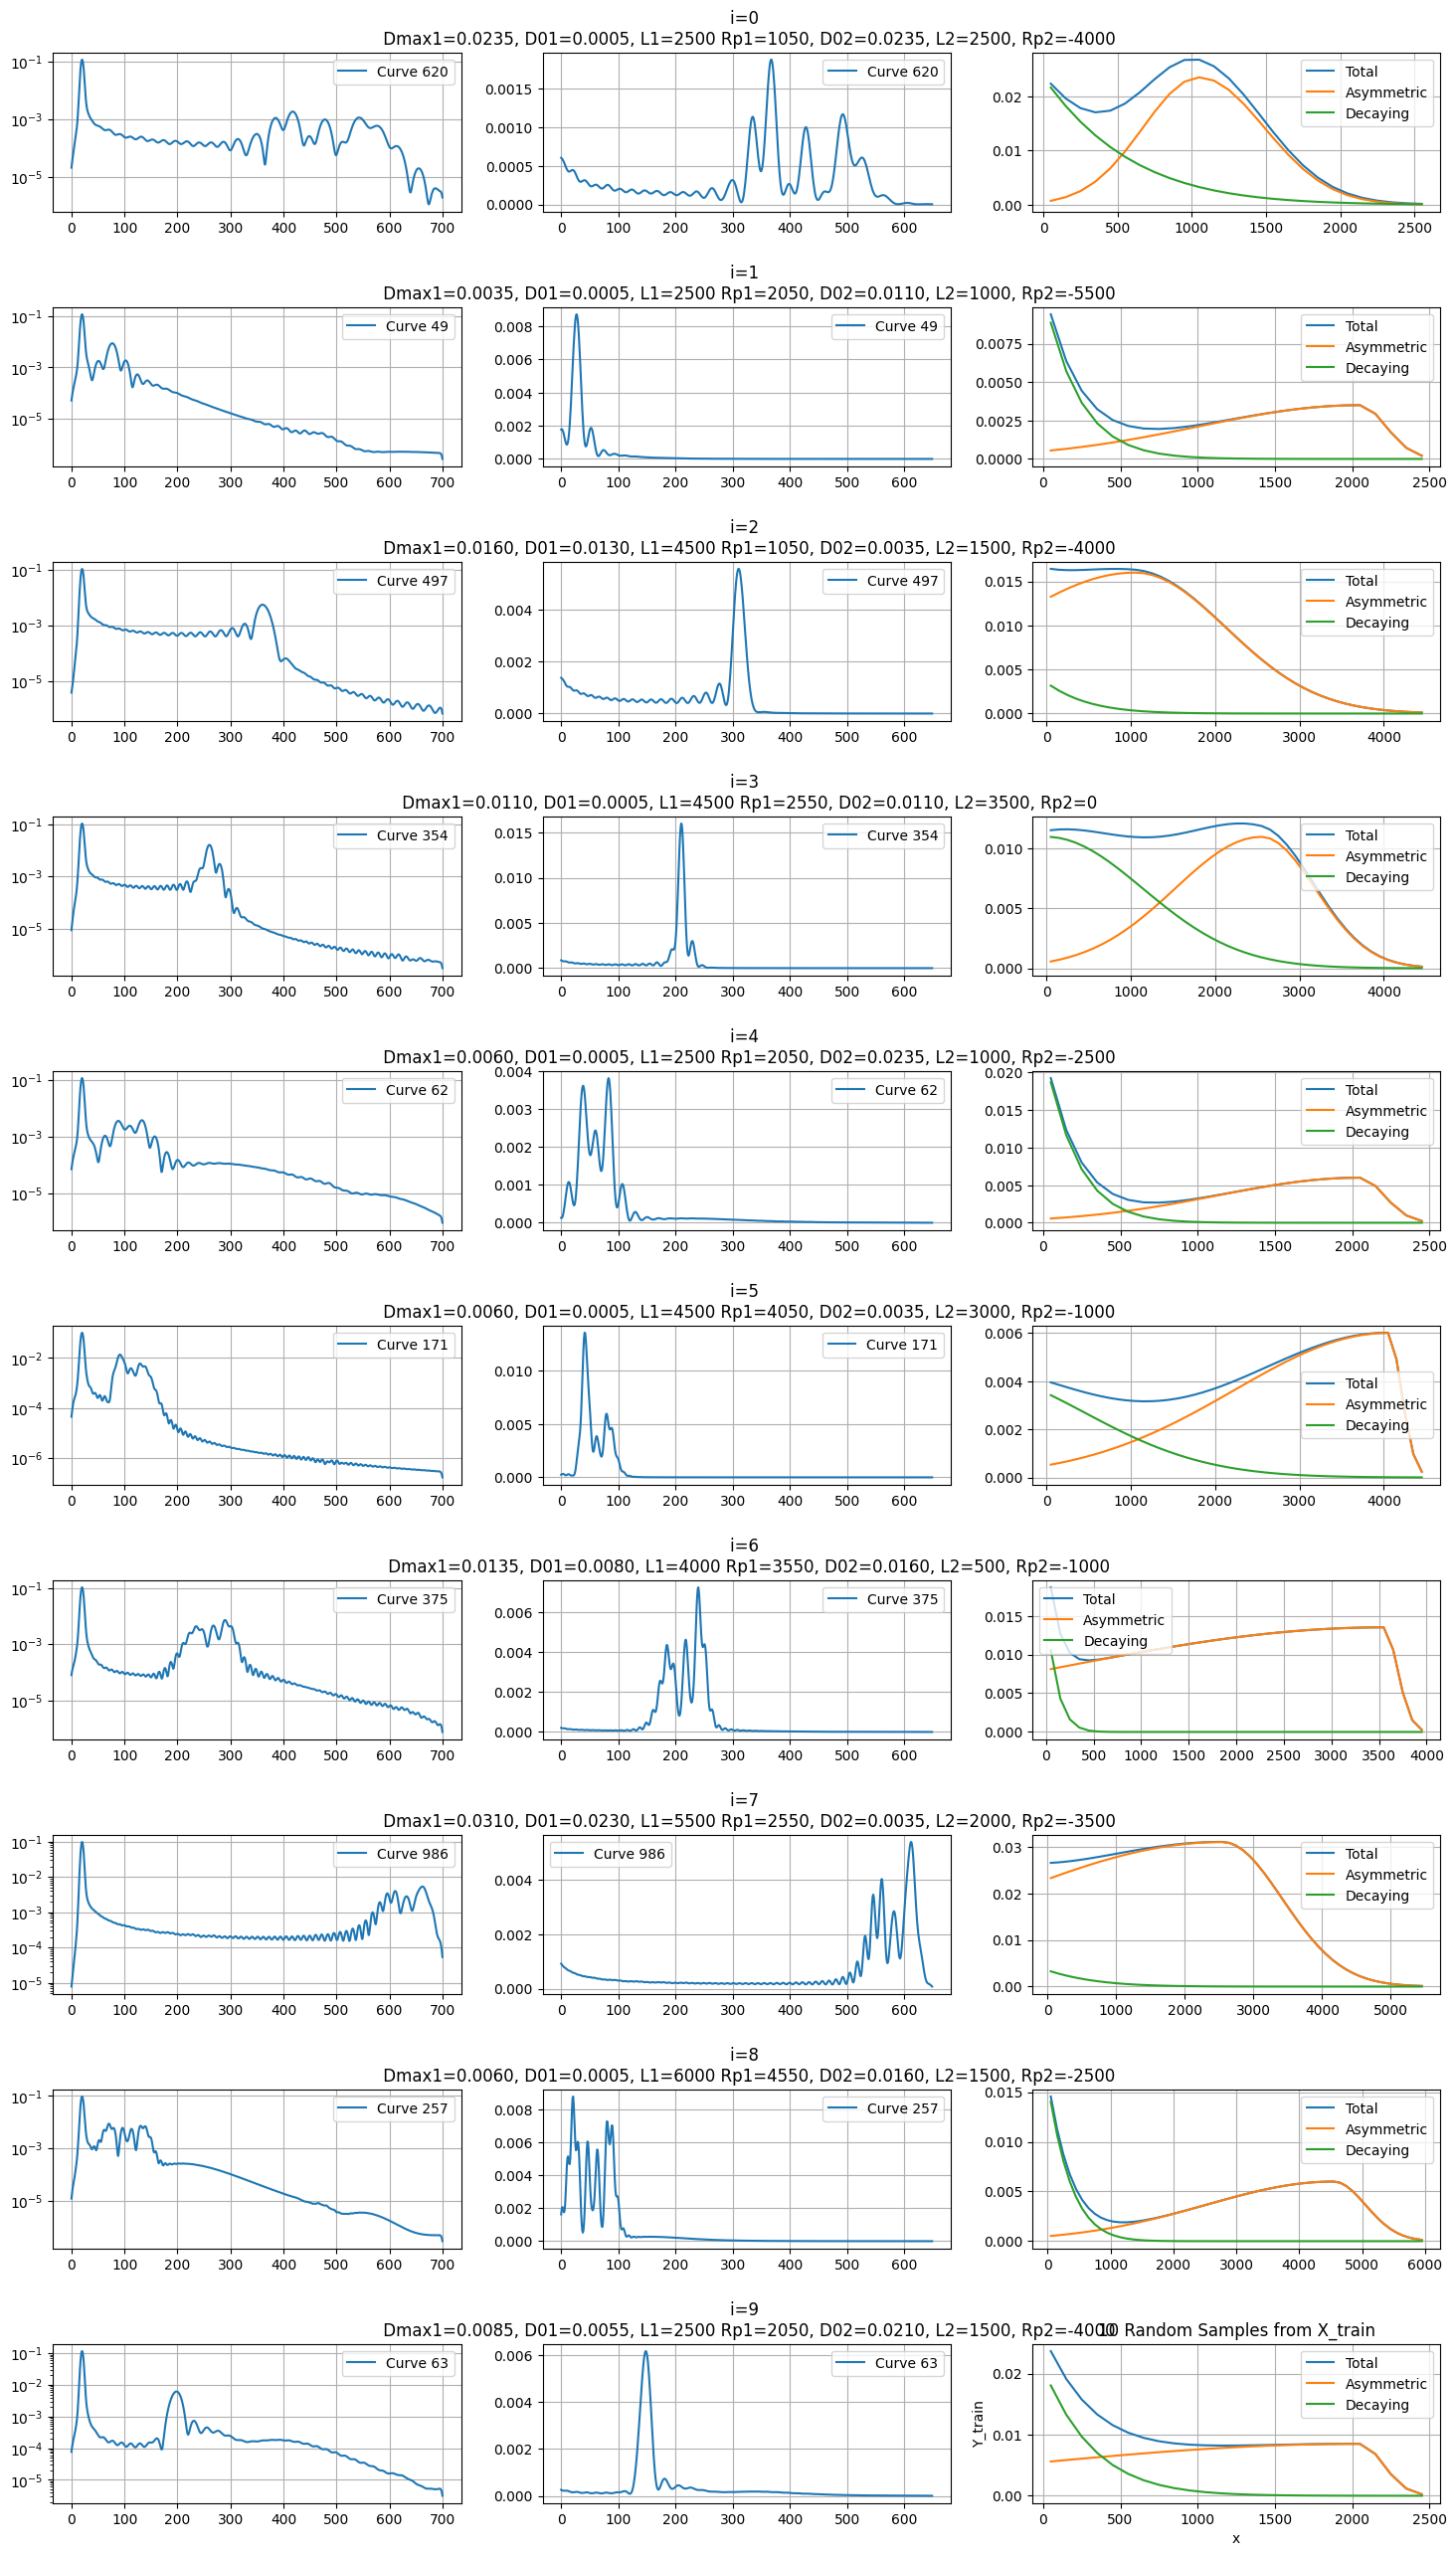

In [ ]:
import helpers as h
import xrd
from importlib import reload
reload(xrd)
reload(h)

rng = np.random.default_rng()
indices = rng.choice(X_train.shape[0], size=10, replace=False)
x_long = torch.linspace(0, 1000 - 1, 1000)

plt.figure(figsize=(12, 6))

fig, axes = plt.subplots(len(indices), 3, figsize=(18, 32))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows


for i, idx in enumerate(indices):
    # print(X_train[idx])
    curve, profile = xrd.compute_curve_and_profile(array=X_train[idx])
    axes[i, 0].plot(x, curve.Y_R_vseZ, label=f"Curve {idx}")
    axes[i, 0].grid(True)
    axes[i, 0].set_yscale('log')
    axes[i, 0].legend()

    axes[i, 1].plot(curve.ML_X, curve.ML_Y, label=f"Curve {idx}")
    axes[i, 1].set_title(f"i={i} \n {h.fparam(arr=X_train[idx])}")
    axes[i, 1].grid(True)
    # axes[i, 0].set_yscale('log')
    axes[i, 1].legend()

    axes[i, 2].plot(profile.X, profile.total_Y, label="Total")
    axes[i, 2].plot(profile.X, profile.asymmetric_Y, label="Asymmetric")
    axes[i, 2].plot(profile.X, profile.decaying_Y, label="Decaying")
    axes[i, 2].grid(True)
    axes[i, 2].legend()

plt.title("10 Random Samples from X_train")
plt.xlabel("x")
plt.ylabel("Y_train")
plt.grid(True)
plt.legend()
plt.show()

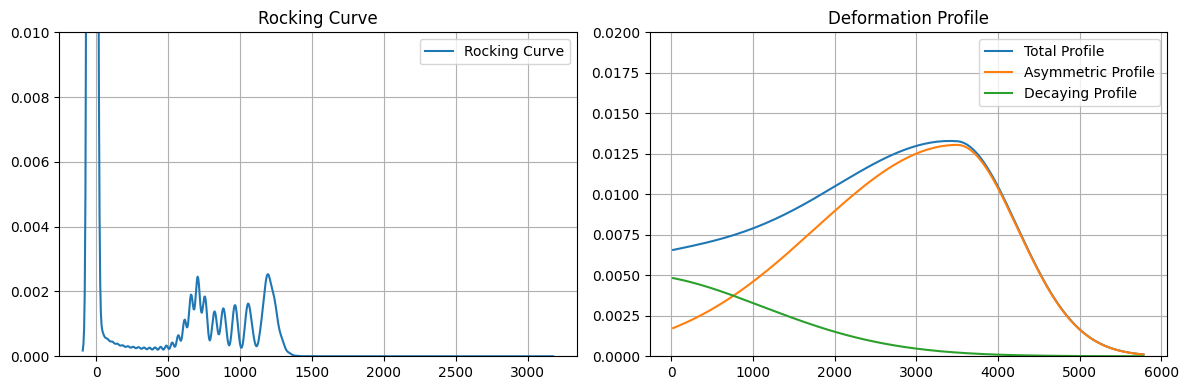

In [ ]:
# ПРИКЛАД ВИВЕДЕННЯ ОДНІЄЇ КРИВОЇ ТА ПРОФІЛЮ ДЕФОРМАЦІЇ
import xrd
from importlib import reload
reload(xrd)

params_obj = xrd.DeformationProfile(
    Dmax1=0.01305,
    D01=0.0017,
    L1=5800e-8,
    Rp1=3500e-8,
    D02=0.004845,
    L2=4000e-8,
    Rp2=-500e-8,
    Dmin=0.0001,
    dl=40e-8
)

curve, profile = xrd.compute_curve_and_profile(params_obj=params_obj)

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 12 width, 4 height

axes[0].set_title("Rocking Curve")
axes[0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Rocking Curve")
axes[0].set_ylim(0, 0.01)
axes[0].grid(True)
axes[0].legend()

axes[1].set_title("Deformation Profile")
axes[1].plot(profile.X, profile.total_Y, label="Total Profile")
axes[1].plot(profile.X, profile.asymmetric_Y, label="Asymmetric Profile")
axes[1].plot(profile.X, profile.decaying_Y, label="Decaying Profile")
axes[1].set_ylim(0, 0.02)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# compare original params/normalized/denormalized
from train_from_file import NormalizedXRDDataset, denorm_params

ds_tr = NormalizedXRDDataset(X_train[[0, 0]], Y_train[[0, 0]], train=True)
print(ds_tr)
dl_tr = torch.utils.data.DataLoader(ds_tr, shuffle=True)
print(ds_tr)

for x, y in dl_tr:
    x, y = x.to('cpu'), y.to('cpu')
    print(x.shape, y.shape)

print(X_train[[0, 0]])
print(y)
denorm_params(y)

torch.Size([1, 1, 650]) torch.Size([1, 7])
torch.Size([1, 1, 650]) torch.Size([1, 7])
tensor([[ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05],
        [ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05]], device='mps:0')
tensor([[0.9440, 0.6910, 0.8683, 0.1486, 0.0325, 0.1100, 0.4367]])


tensor([[ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05]])

True params: [0.021, 0.013, 5.5e-05, 3.05e-05, 0.006, 4.5e-05, -2e-05], Pred params: [0.021182, 0.012925, 6.054e-05, 3.109e-05, 0.006555, 4.345e-05, -2.746e-05]
True params: [0.0285, 0.013, 6e-05, 3.05e-05, 0.011, 5e-06, 9.095e-21], Pred params: [0.029245, 0.013293, 6.021e-05, 3.108e-05, 0.011561, 5.032e-06, -1.673e-08]
True params: [0.0235, 0.0205, 4.5e-05, 3.55e-05, 0.0085, 1.5e-05, -4.5e-05], Pred params: [0.023938, 0.020824, 4.748e-05, 3.318e-05, 0.007951, 1.488e-05, -4.523e-05]
True params: [0.026, 0.008, 6.5e-05, 1.05e-05, 0.0185, 4.5e-05, -5e-06], Pred params: [0.02812, 0.008437, 6.668e-05, 9.092e-06, 0.018418, 4.52e-05, -3.808e-06]
True params: [0.0285, 0.013, 2.5e-05, 1.05e-05, 0.0035, 2e-05, -5e-05], Pred params: [0.029128, 0.012087, 2.772e-05, 1.217e-05, 0.004323, 2.072e-05, -2.871e-05]
True params: [0.001, 0.0005, 4.5e-05, 1.55e-05, 0.0085, 2.5e-05, -5.5e-05], Pred params: [0.001102, 0.000597, 4.409e-05, 1.604e-05, 0.008668, 2.397e-05, -5.235e-05]
True params: [0.006, 0.000

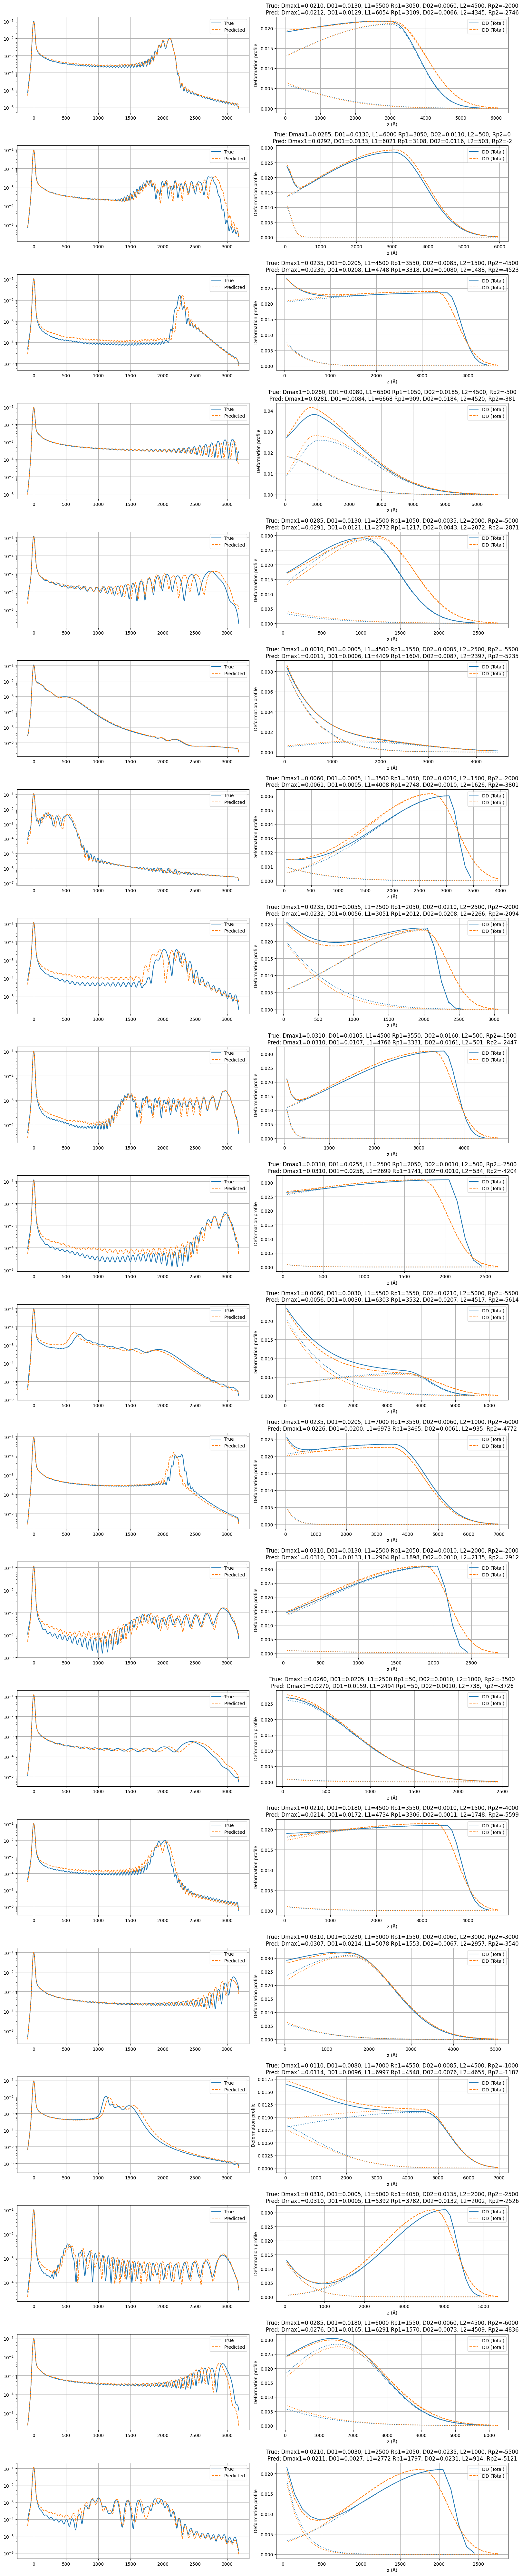

In [36]:
import matplotlib.pyplot as plt
import xrd
import helpers as h
from importlib import reload
reload(xrd)

# Examples after training (true vs predicted):
true_pred_pairs = [
  ([0.021000, 0.013000, 5.500e-05, 3.050e-05, 0.006000, 4.500e-05, -2.000e-05], [0.021182, 0.012925, 6.054e-05, 3.109e-05, 0.006555, 4.345e-05, -2.746e-05]),
  ([0.028500, 0.013000, 6.000e-05, 3.050e-05, 0.011000, 5.000e-06, 9.095e-21], [0.029245, 0.013293, 6.021e-05, 3.108e-05, 0.011561, 5.032e-06, -1.673e-08]),
  ([0.023500, 0.020500, 4.500e-05, 3.550e-05, 0.008500, 1.500e-05, -4.500e-05], [0.023938, 0.020824, 4.748e-05, 3.318e-05, 0.007951, 1.488e-05, -4.523e-05]),
  ([0.026000, 0.008000, 6.500e-05, 1.050e-05, 0.018500, 4.500e-05, -5.000e-06], [0.028120, 0.008437, 6.668e-05, 9.092e-06, 0.018418, 4.520e-05, -3.808e-06]),
  ([0.028500, 0.013000, 2.500e-05, 1.050e-05, 0.003500, 2.000e-05, -5.000e-05], [0.029128, 0.012087, 2.772e-05, 1.217e-05, 0.004323, 2.072e-05, -2.871e-05]),
  ([0.001000, 0.000500, 4.500e-05, 1.550e-05, 0.008500, 2.500e-05, -5.500e-05], [0.001102, 0.000597, 4.409e-05, 1.604e-05, 0.008668, 2.397e-05, -5.235e-05]),
  ([0.006000, 0.000500, 3.500e-05, 3.050e-05, 0.001000, 1.500e-05, -2.000e-05], [0.006146, 0.000506, 4.008e-05, 2.748e-05, 0.001024, 1.626e-05, -3.801e-05]),
  ([0.023500, 0.005500, 2.500e-05, 2.050e-05, 0.021000, 2.500e-05, -2.000e-05], [0.023167, 0.005550, 3.051e-05, 2.012e-05, 0.020833, 2.266e-05, -2.094e-05]),
  ([0.031000, 0.010500, 4.500e-05, 3.550e-05, 0.016000, 5.000e-06, -1.500e-05], [0.030986, 0.010657, 4.766e-05, 3.331e-05, 0.016080, 5.009e-06, -2.447e-05]),
  ([0.031000, 0.025500, 2.500e-05, 2.050e-05, 0.001000, 5.000e-06, -2.500e-05], [0.030999, 0.025773, 2.699e-05, 1.741e-05, 0.001005, 5.338e-06, -4.204e-05]),

    ([0.006000, 0.003000, 5.500e-05, 3.550e-05, 0.021000, 5.000e-05, -5.500e-05], [0.005629, 0.003031, 6.303e-05, 3.532e-05, 0.020664, 4.517e-05, -5.614e-05]),
  ([0.023500, 0.020500, 7.000e-05, 3.550e-05, 0.006000, 1.000e-05, -6.000e-05], [0.022611, 0.020035, 6.973e-05, 3.465e-05, 0.006063, 9.353e-06, -4.772e-05]),
  ([0.031000, 0.013000, 2.500e-05, 2.050e-05, 0.001000, 2.000e-05, -2.000e-05], [0.031000, 0.013334, 2.904e-05, 1.898e-05, 0.001001, 2.135e-05, -2.912e-05]),
  ([0.026000, 0.020500, 2.500e-05, 5.000e-07, 0.001000, 1.000e-05, -3.500e-05], [0.026974, 0.015934, 2.494e-05, 5.002e-07, 0.001015, 7.383e-06, -3.726e-05]),
  ([0.021000, 0.018000, 4.500e-05, 3.550e-05, 0.001000, 1.500e-05, -4.000e-05], [0.021448, 0.017218, 4.734e-05, 3.306e-05, 0.001061, 1.748e-05, -5.599e-05]),
  ([0.031000, 0.023000, 5.000e-05, 1.550e-05, 0.006000, 3.000e-05, -3.000e-05], [0.030740, 0.021397, 5.078e-05, 1.553e-05, 0.006662, 2.957e-05, -3.540e-05]),
  ([0.011000, 0.008000, 7.000e-05, 4.550e-05, 0.008500, 4.500e-05, -1.000e-05], [0.011441, 0.009647, 6.997e-05, 4.548e-05, 0.007567, 4.655e-05, -1.187e-05]),
  ([0.031000, 0.000500, 5.000e-05, 4.050e-05, 0.013500, 2.000e-05, -2.500e-05], [0.030989, 0.000500, 5.392e-05, 3.782e-05, 0.013172, 2.002e-05, -2.526e-05]),
  ([0.028500, 0.018000, 6.000e-05, 1.550e-05, 0.006000, 4.500e-05, -6.000e-05], [0.027578, 0.016509, 6.291e-05, 1.570e-05, 0.007250, 4.509e-05, -4.836e-05]),
  ([0.021000, 0.003000, 2.500e-05, 2.050e-05, 0.023500, 1.000e-05, -5.500e-05], [0.021098, 0.002659, 2.772e-05, 1.797e-05, 0.023067, 9.138e-06, -5.121e-05]),

]

def plot_profils(ax, profile, color, linestyle, pred=False):
    # L = dl * km
    # x_vals = [(L - dl * k + dl / 2) / 1e-8 for k in range(1, km + 1)]
    # ax.figure(figsize=(5, 3))
    ax.plot(profile.X, profile.total_Y, label='DD (Total)', color=color, linestyle=linestyle)
    # 'DDPL1 (Asymmetric Gaussian)'
    ax.plot(profile.X, profile.asymmetric_Y, label=None, linestyle=':', color=color)
    # 'DDPL2 (Decaying Gaussian)'
    ax.plot(profile.X, profile.decaying_Y, label=None, linestyle=':', color=color)
    ax.set_xlabel('z (Å)')
    ax.set_ylabel('Deformation profile')
    # ax.set_title('Deformation Profile Components')

fig, axes = plt.subplots(len(true_pred_pairs), 2, figsize=(16, len(true_pred_pairs) * 4))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows

for i, (true_params, pred_params) in enumerate(true_pred_pairs):
    print(f"True params: {true_params}, Pred params: {pred_params}")
    # add true_params to plot

    curve, profile_true = xrd.compute_curve_and_profile(array=true_params, dl=100e-8)
    
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="True")
    axes[i, 0].grid(True)
    # log
    axes[i, 0].set_yscale('log')
    # axes[i, 0].set_ylim(0, 0.02)

    plot_profils(axes[i, 1], profile_true, 'C0', '-')

    curve, profile_pred = xrd.compute_curve_and_profile(array=pred_params, dl=100e-8)

    plot_profils(axes[i, 1], profile_pred, 'C1', '--')
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Predicted", linestyle='dashed')
    axes[i, 1].set_title(f"True: {h.fparam(arr=true_params)}\nPred: {h.fparam(arr=pred_params)}")
    axes[i, 1].grid(True)
    # axes[i, 1].set_ylim(0, 0.03)
    axes[i, 1].legend()
    axes[i, 0].legend()


plt.tight_layout()
plt.show()